In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import metpy
import numpy as np
from matplotlib.ticker import FormatStrFormatter
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
path = '/data/keeling/a/sf20/b/wrf-partmc-spatial-het/WRFV3/test/em_les/namelists-and-soundings'

In [3]:
df = pd.read_csv(os.path.join(path, 'input_sounding_base'), skiprows=1, header=None, delim_whitespace=True)
df.columns = ['Height (m)', 'Potential Temp (K)', 'Vapor Mix Ratio (g/kg)', 'U (m/s)', 'V (m/s)']

grnd_data = pd.read_csv(os.path.join(path, 'input_sounding_base'),  header=None, nrows=1, delim_whitespace=True)
grnd_data.columns = ['Press (hPa)', 'Potential Temp (K)', 'Vapor Mix Ratio (g/kg)']
grnd_data['Height (m)'] = 0

In [4]:
df = df.append(grnd_data)
df = df.sort_values('Height (m)').reset_index(drop=True)

/tmp/ipykernel_148405/949782448.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(grnd_data)


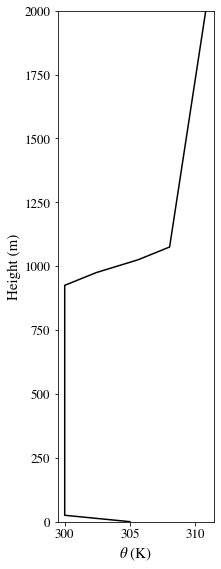

In [65]:
fig, ax = plt.subplots(1,1, figsize=(2.8, 9.4))
ax.plot(df['Potential Temp (K)'], df['Height (m)'], c='k')
ax.set_xlabel('$\\theta$ (K)', fontsize=15)
ax.set_ylabel('Height (m)', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylim(0, 2000)
#plt.savefig('default_sounding.pdf', format='pdf', bbox_inches='tight')


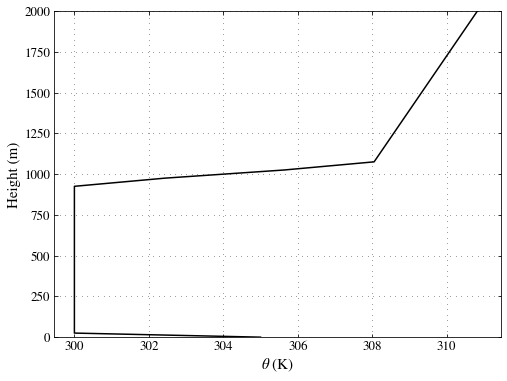

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8, 6))
ax.plot(df['Potential Temp (K)'], df['Height (m)'], c='k')
ax.set_xlabel('$\\theta$ (K)', fontsize=15)
ax.set_ylabel('Height (m)', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylim(0, 2000)
ax.grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,5), c='#414141')
ax.grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
ax.grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
ax.xaxis.set_major_formatter(FormatStrFormatter('%3.0f'))
ax.tick_params(axis='both', which='major', labelsize=13, direction='in', top=True, right=True, bottom=True, left=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)
plt.savefig('WRF-LES_default_sounding.pdf', format='pdf', bbox_inches='tight')

In [7]:
df.columns

Index(['Height (m)', 'Potential Temp (K)', 'Vapor Mix Ratio (g/kg)', 'U (m/s)',
       'V (m/s)', 'Press (hPa)'],
      dtype='object')

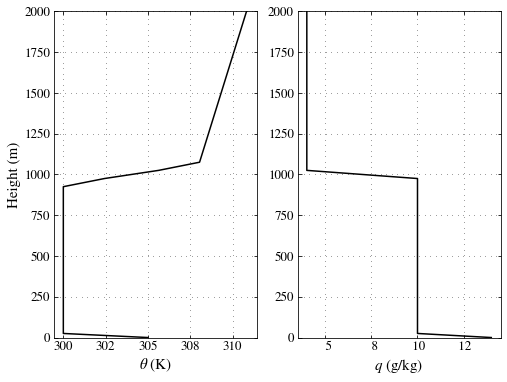

In [10]:
fig, ax = plt.subplots(1,2, figsize=(8, 6))
ax[0].plot(df['Potential Temp (K)'], df['Height (m)'], c='k')
ax[0].set_xlabel('$\\theta$ (K)', fontsize=15)
ax[0].set_ylabel('Height (m)', fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=13)
ax[0].set_ylim(0, 2000)
ax[0].grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,5), c='#414141')
ax[0].grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
ax[0].grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%3.0f'))
ax[0].tick_params(axis='both', which='major', labelsize=13, direction='in', top=True, right=True, bottom=True, left=True)
ax[0].tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)

ax[1].plot(df['Vapor Mix Ratio (g/kg)'], df['Height (m)'], c='k')
ax[1].set_xlabel('$q$ (g/kg)', fontsize=15)
#ax[1].set_ylabel('Height (m)', fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=13)
ax[1].set_ylim(0, 2000)
ax[1].grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,5), c='#414141')
ax[1].grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
ax[1].grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,5), c='#414141')
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%3.0f'))
ax[1].tick_params(axis='both', which='major', labelsize=13, direction='in', top=True, right=True, bottom=True, left=True)
ax[1].tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)
plt.savefig('WRF-LES_default_sounding.pdf', format='pdf', bbox_inches='tight')

If I have the water vapor mixing ratio (q), I can calculate the relative humidity by first solving for the saturation vapor pressure (function of T -> recover tempeature from potential temperature). We then know that qs (saturation specific humidity) is 0.622es /(p-0.378es), and RH can be expressed as (q/qs)*100%. 

In [66]:
from metpy.calc import dewpoint_from_specific_humidity, height_to_pressure_std, temperature_from_potential_temperature
from metpy.units import units
result = dewpoint_from_specific_humidity(1000 * units.hPa, 10 * units.degC, 5 * units('g/kg'))

In [67]:
units.meter

<Unit('meter')>

In [68]:

press = height_to_pressure_std(np.array(df['Height (m)'])*units.meter)
theta = np.array(df['Potential Temp (K)'])*units.kelvin
T = temperature_from_potential_temperature(press, theta)
#result = dewpoint_from_specific_humidity(press, T, 5 * units('g/kg'))

In [69]:
df = pd.read_csv(os.path.join(path, 'input_sounding.SGP'), skiprows=1, header=None, delim_whitespace=True)
df.columns = ['Height (m)', 'Potential Temp (K)', 'Vapor Mix Ratio (g/kg)', 'U (m/s)', 'V (m/s)']

grnd_data = pd.read_csv(os.path.join(path, 'input_sounding'),  header=None, nrows=1, delim_whitespace=True)
grnd_data.columns = ['Press (hPa)', 'Potential Temp (K)', 'Vapor Mix Ratio (g/kg)']

FileNotFoundError: [Errno 2] No such file or directory: '/data/keeling/a/sf20/b/wrf-partmc-spatial-het/WRFV3/test/em_les/namelists-and-soundings/input_sounding'

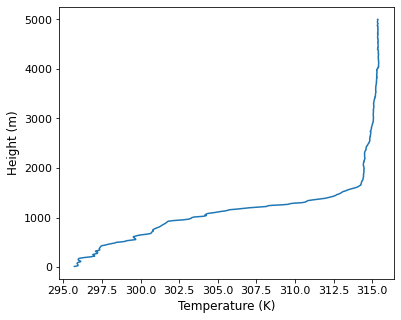

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.plot(df['Potential Temp (K)'], df['Height (m)'])
ax.set_xlabel('Temperature (K)', fontsize=12)
ax.set_ylabel('Height (m)', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=11)